In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
pd.set_option("display.max_row",None)
pd.set_option("display.max_column",None)

In [15]:
traindf = pd.read_csv(r'TaxiFare (1).csv')
traindf.head(5)

,unique_id,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
0,26:21.0,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,52:16.0,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,35:00.0,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,30:42.0,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,51:00.0,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1


In [3]:
sns.set_style('whitegrid')

In [8]:
traindf.shape

(50000, 8)

In [9]:
traindf.isnull().sum()

unique_id               0
amount                  0
date_time_of_pickup     0
longitude_of_pickup     0
latitude_of_pickup      0
longitude_of_dropoff    0
latitude_of_dropoff     0
no_of_passenger         0
dtype: int64

In [10]:
traindf.dtypes

unique_id                object
amount                  float64
date_time_of_pickup      object
longitude_of_pickup     float64
latitude_of_pickup      float64
longitude_of_dropoff    float64
latitude_of_dropoff     float64
no_of_passenger           int64
dtype: object

In [12]:
traindf['amount'] = pd.to_numeric(traindf['amount'], errors='coerce')

In [16]:
traindf['date_time_of_pickup'] = pd.to_datetime(traindf['date_time_of_pickup'], format='%Y-%m-%d %H:%M:%S UTC')

In [17]:
traindf['Hour'] = traindf['date_time_of_pickup'].dt.hour
traindf['minute'] = traindf['date_time_of_pickup'].dt.minute
traindf['date'] = traindf['date_time_of_pickup'].dt.day
traindf['day'] = traindf['date_time_of_pickup'].dt.dayofweek
traindf['month'] = traindf['date_time_of_pickup'].dt.month
traindf['year'] = traindf['date_time_of_pickup'].dt.year

In [18]:
traindf.head()

,unique_id,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger,Hour,minute,date,day,month,year
0,26:21.0,4.5,2009-06-15 17:26:21,-73.844311,40.721319,-73.841610,40.712278,1,17,26,15,0,6,2009
1,52:16.0,16.9,2010-01-05 16:52:16,-74.016048,40.711303,-73.979268,40.782004,1,16,52,5,1,1,2010
2,35:00.0,5.7,2011-08-18 00:35:00,-73.982738,40.761270,-73.991242,40.750562,2,0,35,18,3,8,2011
3,30:42.0,7.7,2012-04-21 04:30:42,-73.987130,40.733143,-73.991567,40.758092,1,4,30,21,5,4,2012
4,51:00.0,5.3,2010-03-09 07:51:00,-73.968095,40.768008,-73.956655,40.783762,1,7,51,9,1,3,2010


In [19]:
traindf.drop(traindf[traindf['date_time_of_pickup'].isna()].index, inplace=True)

In [21]:
traindf.drop('date_time_of_pickup', axis=1, inplace=True)

In [22]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
#apply it to features

imputer.fit(traindf[['amount','no_of_passenger']])
traindf[['amount','no_of_passenger']] = imputer.transform(traindf[['amount','no_of_passenger']])

In [23]:
traindf.isna().sum()

unique_id               0
amount                  0
longitude_of_pickup     0
latitude_of_pickup      0
longitude_of_dropoff    0
latitude_of_dropoff     0
no_of_passenger         0
Hour                    0
minute                  0
date                    0
day                     0
month                   0
year                    0
dtype: int64

In [24]:
traindf.shape

(50000, 13)

<Axes: ylabel='no_of_passenger'>

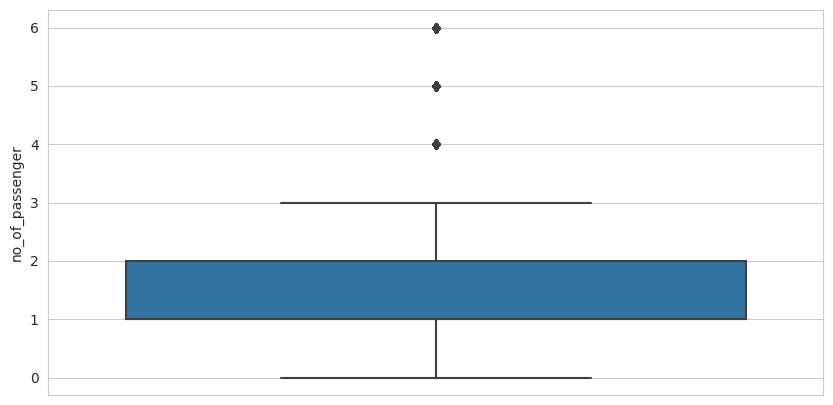

In [26]:
plt.figure(figsize=(10,5))
sns.boxplot(y=traindf['no_of_passenger'])

<Axes: ylabel='amount'>

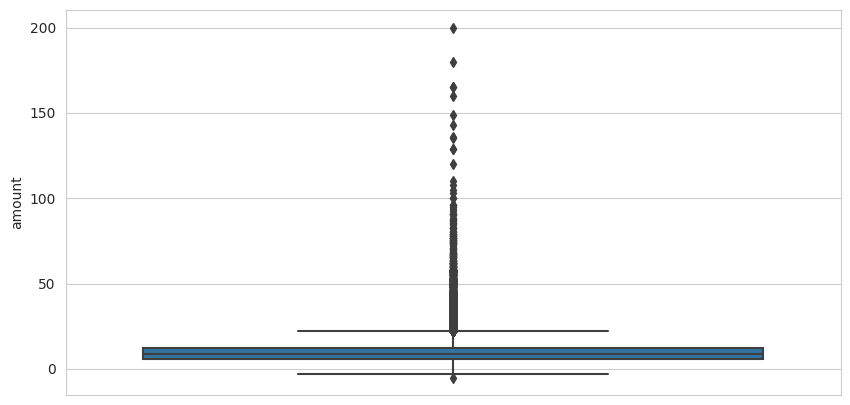

In [32]:
plt.figure(figsize=(10,5))
sns.boxplot(y=traindf['amount'])

In [34]:
Q1 = traindf['no_of_passenger'].quantile(0.25)
Q3 = traindf['no_of_passenger'].quantile(0.75)

IQR = Q3 - Q1

lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR
print('Lower :',lower)
print('Upper :',upper)

Lower : -0.5
Upper : 3.5


In [35]:
traindf['no_of_passenger'].sort_values(ascending=True).head(10)

9159     0.0
16975    0.0
5517     0.0
25021    0.0
25023    0.0
18724    0.0
5058     0.0
44277    0.0
15554    0.0
10642    0.0
Name: no_of_passenger, dtype: float64

In [36]:
traindf.drop(traindf[traindf['no_of_passenger'] > 4 ].index, inplace = True)
traindf.drop(traindf[traindf['no_of_passenger'] < 0 ].index, inplace = True)
traindf.drop(traindf[traindf['no_of_passenger'] == 0.12 ].index, inplace = True)
traindf.drop(traindf[traindf['no_of_passenger'].isna() ].index, inplace = True)

In [37]:
traindf['amount'].sort_values(ascending=True).head(10)

42337   -5.00
13032   -3.00
2039    -2.90
2486    -2.50
28839   -2.50
36722   -2.50
27891    0.00
47302    0.00
10002    0.00
2780     0.01
Name: amount, dtype: float64

In [39]:
traindf.drop(traindf[traindf['amount'] > 150 ].index, inplace = True)
traindf.drop(traindf[traindf['amount'] == 0 ].index, inplace = True)
traindf.drop(traindf[traindf['amount'].isna() ].index, inplace = True)
traindf.head(1)

,unique_id,amount,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger,Hour,minute,date,day,month,year
0,26:21.0,4.5,-73.844311,40.721319,-73.84161,40.712278,1.0,17,26,15,0,6,2009


In [40]:
traindf.drop(traindf[traindf['latitude_of_pickup'] > 90].index, inplace=True)
traindf.drop(traindf[traindf['latitude_of_pickupp'] < -90].index, inplace=True)
traindf.drop(traindf[traindf['latitude_of_pickup'] > 90].index, inplace=True)
traindf.drop(traindf[traindf['latitude_of_pickup'] < -90].index, inplace=True)

In [42]:
traindf.drop(traindf[traindf['longitude_of_pickup'] > 180].index, inplace=True)
traindf.drop(traindf[traindf['longitude_of_pickup'] < -180].index, inplace=True)
traindf.drop(traindf[traindf['longitude_of_pickup'] > 180].index, inplace=True)
traindf.drop(traindf[traindf['longitude_of_pickup'] < -180].index, inplace=True)

In [43]:
traindf.shape

(45550, 13)

In [44]:
traindf.isna().sum()

unique_id               0
amount                  0
longitude_of_pickup     0
latitude_of_pickup      0
longitude_of_dropoff    0
latitude_of_dropoff     0
no_of_passenger         0
Hour                    0
minute                  0
date                    0
day                     0
month                   0
year                    0
dtype: int64

In [45]:
from math import *

def haversine(a):
    lon1=a[0]
    lat1=a[1]
    lon2=a[2]
    lat2=a[3]
    """
    Calculate the great circle distance between two points
    on the earth (specified in decimal degrees)
    """
    # convert decimal degrees to radians
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])

    # haversine formula
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c =  2 * asin(sqrt(a))
    # Radius of earth in kilometers is 6371
    km = 6371* c
    return km

In [49]:
traindf['distance'] = traindf[['longitude_of_pickup','latitude_of_pickup','longitude_of_dropoff','latitude_of_dropoff']].apply(haversine,axis=1)

In [51]:

traindf.drop(['longitude_of_pickup','latitude_of_pickup','longitude_of_dropoff','latitude_of_dropoff'], axis=1, inplace=True)

In [52]:
traindf['Hour'] = traindf['Hour'].astype('int64')
traindf['minute'] = traindf['minute'].astype('int64')
traindf['date'] = traindf['date'].astype('int64')
traindf['day'] = traindf['day'].astype('int64')
traindf['month'] = traindf['month'].astype('int64')
traindf['year'] = traindf['year'].astype('int64')

In [53]:
traindf.head()

,unique_id,amount,no_of_passenger,Hour,minute,date,day,month,year,distance
0,26:21.0,4.5,1.0,17,26,15,0,6,2009,1.030764
1,52:16.0,16.9,1.0,16,52,5,1,1,2010,8.450134
2,35:00.0,5.7,2.0,0,35,18,3,8,2011,1.389525
3,30:42.0,7.7,1.0,4,30,21,5,4,2012,2.799270
4,51:00.0,5.3,1.0,7,51,9,1,3,2010,1.999157


In [54]:
traindf['distance'].sort_values(ascending=True).head(10)

49999    0.0
37861    0.0
2763     0.0
37938    0.0
37956    0.0
2747     0.0
38000    0.0
38059    0.0
2722     0.0
16240    0.0
Name: distance, dtype: float64

In [55]:
traindf.drop(traindf[traindf['distance'] >= 130].index, inplace=True)
traindf.drop(traindf[traindf['distance'] <= 0 ].index, inplace=True)

In [56]:
traindf.head()

,unique_id,amount,no_of_passenger,Hour,minute,date,day,month,year,distance
0,26:21.0,4.5,1.0,17,26,15,0,6,2009,1.030764
1,52:16.0,16.9,1.0,16,52,5,1,1,2010,8.450134
2,35:00.0,5.7,2.0,0,35,18,3,8,2011,1.389525
3,30:42.0,7.7,1.0,4,30,21,5,4,2012,2.799270
4,51:00.0,5.3,1.0,7,51,9,1,3,2010,1.999157


<Axes: ylabel='no_of_passenger'>

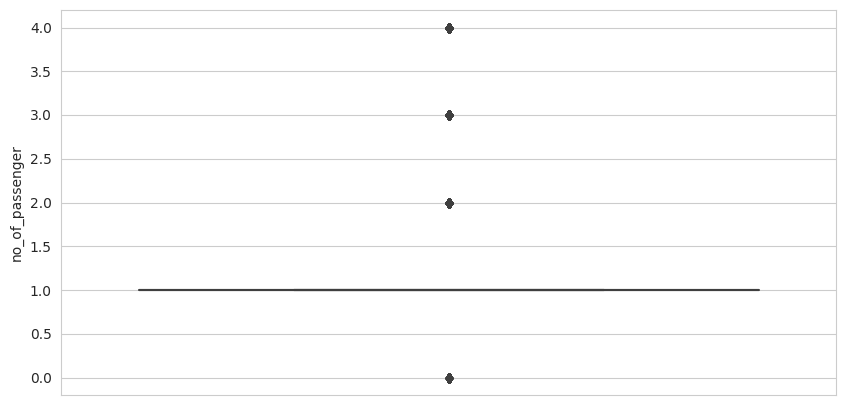

In [61]:
plt.figure(figsize=(10,5))
sns.boxplot(y=traindf['no_of_passenger'])

<Axes: ylabel='amount'>

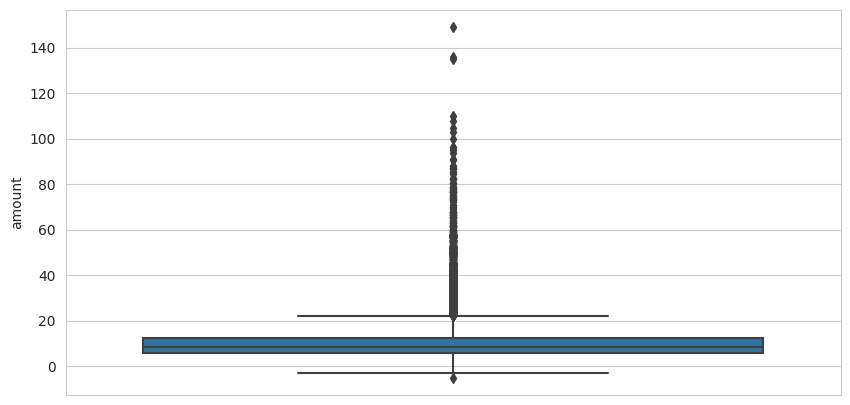

In [62]:
plt.figure(figsize=(10,5))
sns.boxplot(y=traindf['amount'])

In [63]:
traindf['no_of_passenger'] = traindf['no_of_passenger'].astype('int64')

In [75]:
traindf.describe()

,amount,no_of_passenger,Hour,minute,date,day,month,year,distance
count,44123.000000,44123.000000,44123.000000,44123.000000,44123.000000,44123.000000,44123.000000,44123.000000,44123.000000
mean,11.318944,1.322304,13.485484,29.637853,15.663373,3.028964,6.275231,2011.738957,3.413512
std,9.409288,0.675007,6.501501,17.313672,8.653053,1.955427,3.460055,1.868030,4.342786
min,-5.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,2009.000000,0.000084
25%,6.000000,1.000000,9.000000,15.000000,8.000000,1.000000,3.000000,2010.000000,1.289223
50%,8.500000,1.000000,14.000000,30.000000,16.000000,3.000000,6.000000,2012.000000,2.182949
75%,12.500000,1.000000,19.000000,45.000000,23.000000,5.000000,9.000000,2013.000000,3.953577
max,149.000000,4.000000,23.000000,59.000000,31.000000,6.000000,12.000000,2015.000000,129.950482


In [80]:
from sklearn.model_selection import train_test_split

In [84]:
X = traindf[['distance', 'no_of_passenger','Hour','minute','date','day','month','year']]
y = traindf['amount']

In [88]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = Pipeline([
    ('scaler', StandardScaler()),  # Optional: Standardize features
    ('regressor', RandomForestRegressor(random_state=42))
])

In [89]:
model.fit(X_train,y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('regressor', RandomForestRegressor(random_state=42))])

In [92]:

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

predictions = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, predictions)
print(f'Mean Squared Error: {mse}')




Mean Squared Error: 16.604539372063453


In [94]:
# Example of predicting a taxi fare for a new data point
new_data_point = pd.DataFrame({'distance': [0.05], 'no_of_passenger': [1],'Hour':[12],'minute':[45],'date':14,'day':[2],'month':[5],'year':[2021]})  # Example data point
predicted_fare = model.predict(new_data_point)
print(f'Predicted Taxi Fare: {predicted_fare[0]}')

Predicted Taxi Fare: 8.487
